### Plot scattering angle of k+ as a function of its momentum

                    Theta
klong_p kplus_p          
0.2     0.001000  54.4474
        0.001199   112.45
        0.001398  49.3088
        0.001598  1.01594
        0.001797    157.1
...                   ...
0.6     0.199203  23.9458
        0.199402  23.9587
        0.199602  23.9715
        0.199801  23.9843
        0.200000  23.9972

[5000 rows x 1 columns]


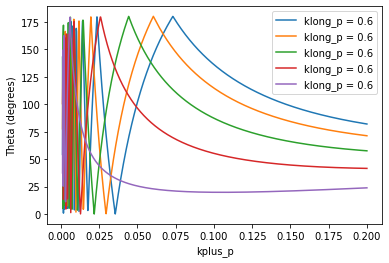

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Known values
kl_p_series = pd.Series([0.2, 0.3, 0.4, 0.5, 0.6]) # klong_p
kp_p_series = pd.Series(np.linspace(0.001, 0.20, 1000)) # kplus_p
n_m = 0.939 # neutron_m
kl_m = 0.4976 # kLong_m
kp_m = 0.4976 # kPlus_m
p_m = 0.938 # proton_m

# Function definitions
def kl_e(kl_p, kl_m): # klong_e
    return np.sqrt(kl_p**2 + kl_m**2)

def kp_e(kp_p, kp_m): # kplus_e
    return np.sqrt(kp_p**2 + kp_m**2)

def n_e(kl_e, kp_e, p_m): # neutron_e
    return (kl_e + p_m - kp_e)

# Creates a multi-index list which will be used in the dataframe
multi_index = pd.MultiIndex.from_product([kl_p_series, kp_p_series], names=['klong_p', 'kplus_p'])
# Creates an empty dataframe using the multi-index
df = pd.DataFrame(columns=['Theta'], index=multi_index)

# Loop through the klong_p values and calculate the theta values for each kplus_p value.  Store the theta values in the dataframe.
for i in kl_p_series:
    kl_e_value = kl_e(i, kl_m)
    
    for j in kp_p_series:
        kp_e_value = kp_e(j, kp_m)
        n_e_value = n_e(kl_e_value, kp_e_value, p_m)
        
        cosTheta = np.cos((kl_p**2 + j**2 + n_m**2 - n_e_value) / (2 * kl_p * j))
        theta = np.degrees(np.arccos(cosTheta))

        df.loc[(i, j), 'Theta'] = theta
    
    sub_df = df.loc[i]  # Create a sub-dataframe for each klong_p value (in other words, the current loop's 'i' value)
    plt.plot(kp_p_series, sub_df['Theta'], label=f'klong_p = {kl_p}') # Plot the sub-dataframe's theta values against the kplus_p values

# for debugging, to see what the data in the dataframe looks like
print(df)

plt.xlabel('kplus_p')
plt.ylabel('Theta (degrees)')
plt.legend()
plt.show()
